# <font color ="FFA500">Forecasting Inflation rates with SARIMA </font>


**SARIMA** is an extension of the regular ARIMA model that adds a seasonality component to the model. This allows us to better capture seasonal affects that the regular ARIMA model does not permit.
To produce SARIMA(p, d, q)(P, D, Q)m,  a seasonality component is added to each factor of the classic ARIMA equation 

$$
y_t' = c + \sum_{n=1}^{p} \phi_n y_{t-n}' + \sum_{n=1}^{q} \theta_n \varepsilon_{t-n} 
+ \sum_{n=1}^{P} \eta_n y_{t-mn}' + \sum_{n=1}^{Q} \omega_n \varepsilon_{t-mn} + \varepsilon_t
$$
 Where:

y’: differenced time series, through both regular, d, and seasonal, D, differencing
P: number of seasonal auto-regressors
ω: coefficients of the seasonal autoregressive components
Q: number of seasonal moving-average components
η: coefficients of the seasonal forecast errors
m: length of season




## <font color ="FFA500">Key Considerations</font>

### 1. Stationarity Requirement

SARIMA models require the time series to be **stationary**, meaning:
- No long-term trend or persistent seasonality
- Constant mean and variance over time

To achieve stationarity:
- **Mean stabilization** is done through differencing:
  - Regular differencing → order \( d \)
  - Seasonal differencing → order \( D \)
- **Variance stabilization** can be achieved using:
  - Log transformation
  - Box-Cox transformation  
These help normalize the amplitude of seasonal fluctuations across time.

---

### 2. Order Selection

Once the series is stationary, we determine the model orders:

#### a. Differencing Orders 
- \( d \): Number of regular differences  
- \( D \): Number of seasonal differences  
Use the **Augmented Dickey-Fuller (ADF)** test to assess whether differencing is required.

#### b. AR and MA Orders  
- Regular terms: \( p \) (AR), \( q \) (MA)  
- Seasonal terms: \( P \) (SAR), \( Q \) (SMA)  
Analyze:
- **Partial Autocorrelation Function (PACF)** → identifies AR (p, P)  
- **Autocorrelation Function (ACF)** → identifies MA (q, Q)  



---



# Data Loading and Visualization

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

: 

In [2]:
infl_df = pd.read_csv('I:/CQAI/TSA/Notebooks/inflation rates dataset.csv')

In [3]:
# infl_df["Date"] =pd.to_datetime(infl_df['Year'].astype(str) + '-' + infl_df['Month'].astype(str) + '-01')
infl_df["Date"]= pd.to_datetime(infl_df["Date"])




In [4]:
infl_df=infl_df.set_index("Date")
infl_df

,Unnamed: 0,Monthly_Inflation
Date,,
1960-01-01,0,NaN
1960-02-01,1,1.000000
1960-03-01,2,0.991323
1960-04-01,3,1.008753
1960-05-01,4,1.006508
...,...,...
2019-09-01,716,1.006250
2019-10-01,717,1.009317
2019-11-01,718,1.009231


In [5]:
infl_df.columns
infl_df = infl_df.drop(columns="Unnamed: 0")

In [6]:
infl_df.columns

Index(['Monthly_Inflation'], dtype='object')

In [7]:
infl_df.isnull().sum()

Monthly_Inflation    2
dtype: int64

In [8]:
infl_df.dropna(inplace= True)

In [9]:
data =pd.read_excel("I:/CQAI/TSA/TSD/TSD\data\Inflation.xls")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\injil\AppData\Local\Temp\ipykernel_19832\4255965784.py:1: SyntaxWarning: invalid escape sequence '\d'
  data =pd.read_excel("I:/CQAI/TSA/TSD/TSD\data\Inflation.xls")


In [14]:
data["Date"]= pd.to_datetime(data["observation_date"])


In [15]:
data=data.set_index("Date")

In [16]:
data

,observation_date,Monthly_CPI,Monthly_Inflation,Monthly_Rate,Bank Rate
Date,,,,,
1960-01-01,1960-01-01,1.678984,NaN,NaN,4.00
1960-02-01,1960-02-01,1.678984,1.000000,0.000000,4.00
1960-03-01,1960-03-01,1.664416,0.991323,-0.867679,4.00
1960-04-01,1960-04-01,1.678984,1.008753,0.875274,4.00
1960-05-01,1960-05-01,1.689910,1.006508,0.650759,4.00
...,...,...,...,...,...
2019-09-01,2019-09-01,123.175008,1.006250,0.625000,5.65
2019-10-01,2019-10-01,124.322601,1.009317,0.931677,5.65
2019-11-01,2019-11-01,125.470194,1.009231,0.923077,5.65


In [17]:
infl_df.index.duplicated().sum()  # check for duplicate timestamps

0

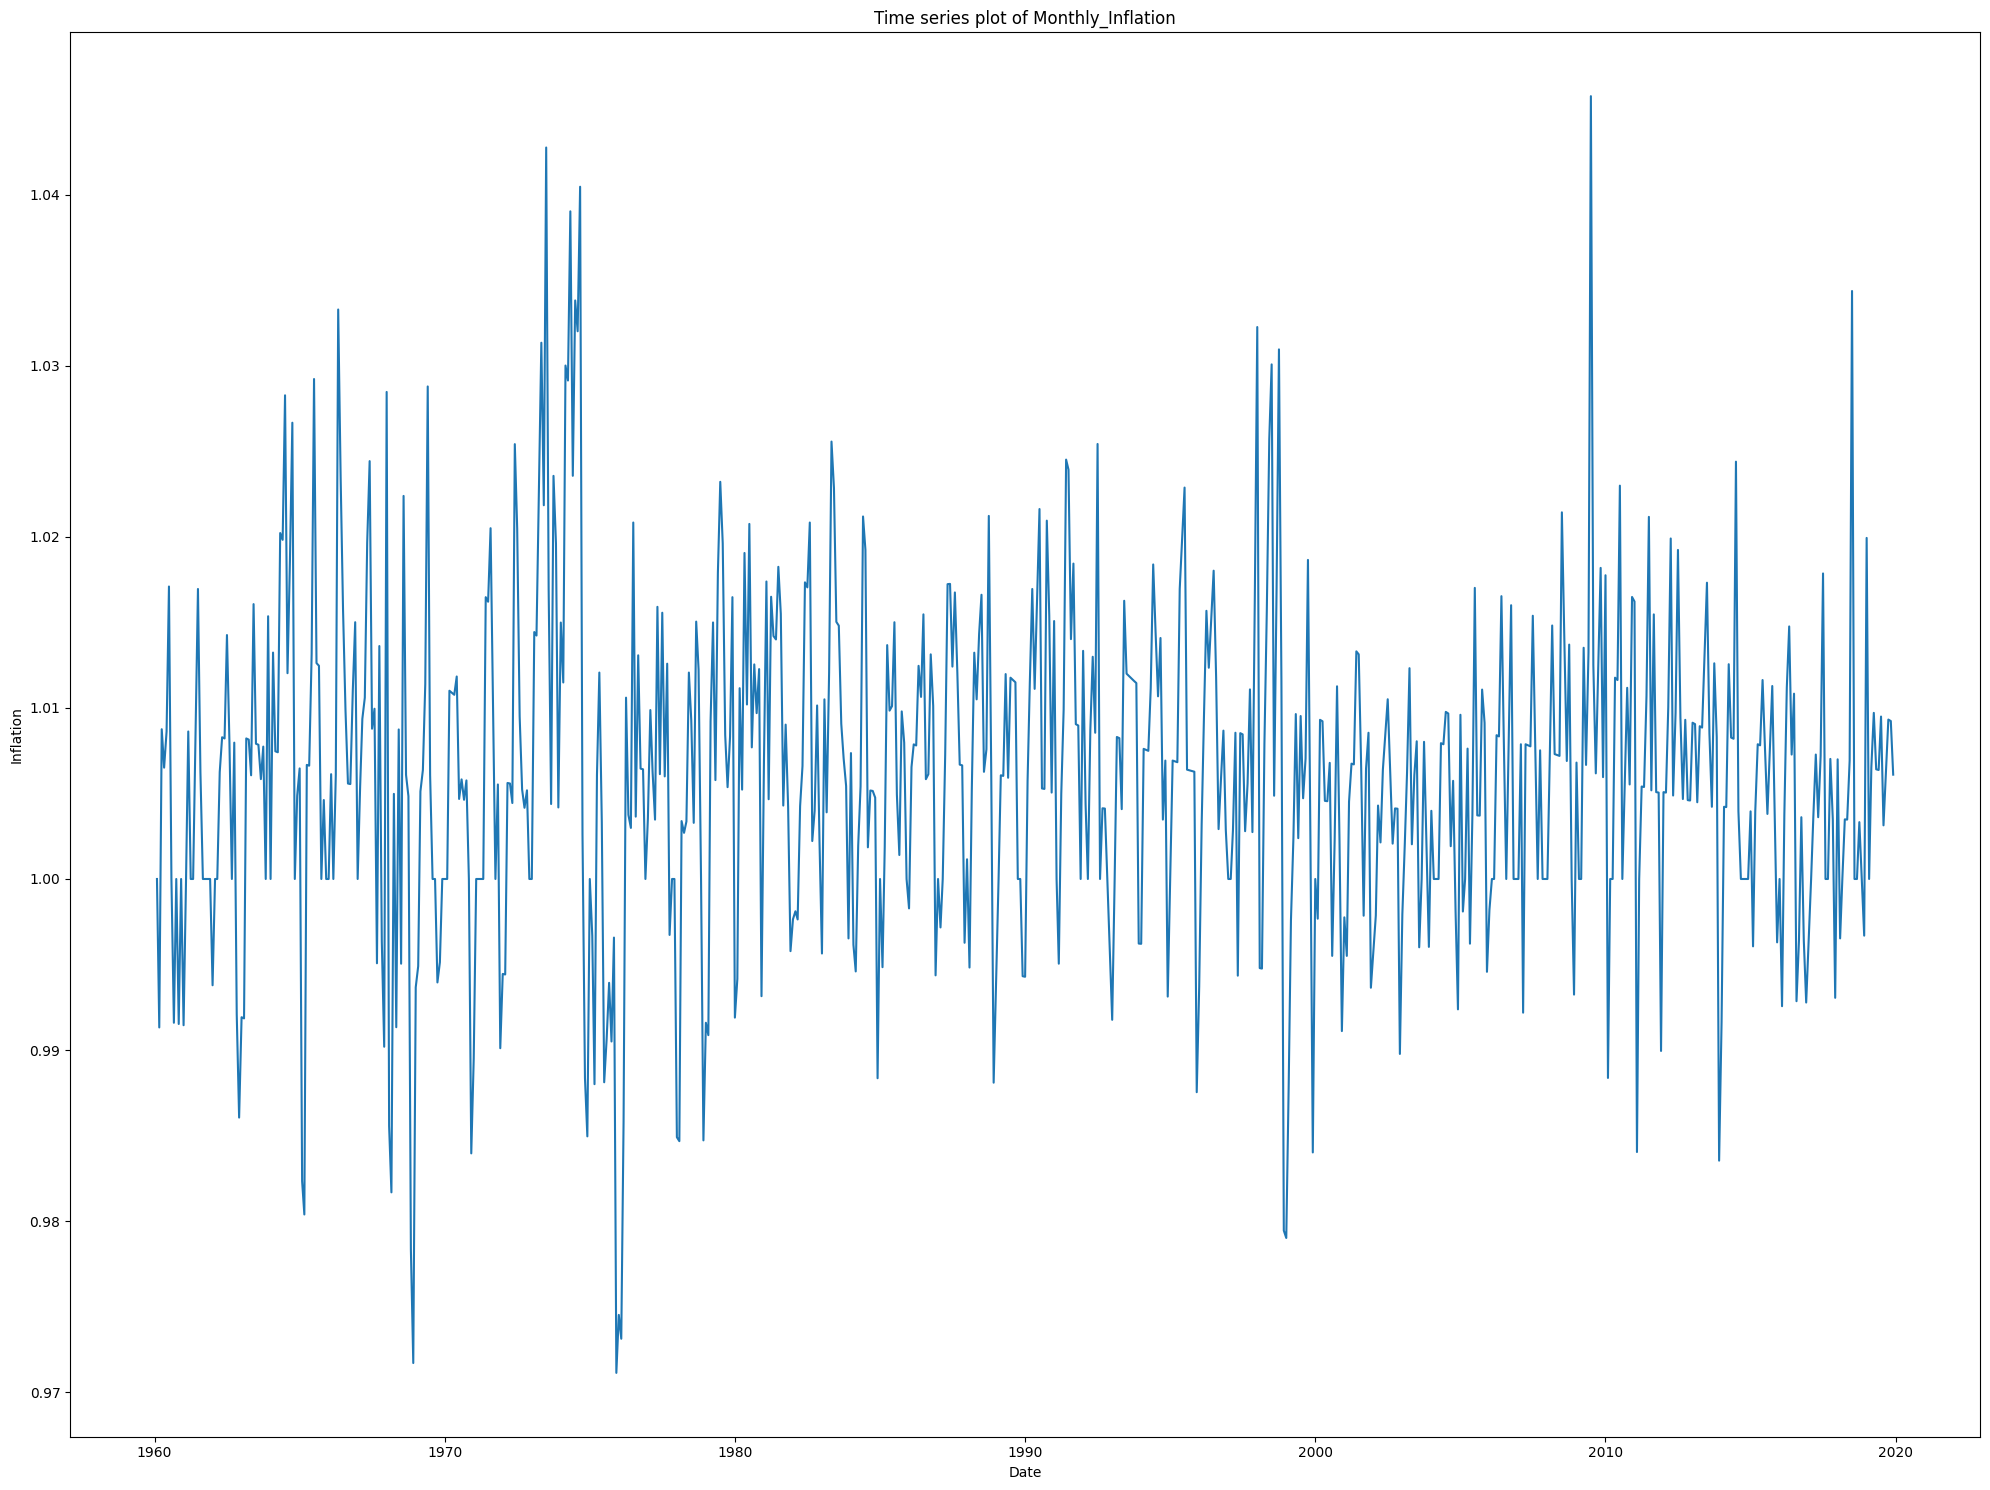

In [18]:
import seaborn as sns

plt.figure(figsize=(20, 15))

plt.plot(infl_df.index, infl_df["Monthly_Inflation"], label="Inflation")
plt.title(f"Time series plot of {"Monthly_Inflation"}")
plt.xlabel("Date")
plt.ylabel("Inflation")  
plt.tight_layout()
plt.show()

# Seasonal Decomposition

This technique allows us to identify three main components of time series:

1. **Trend** – the long-term progression or direction of the data.
2. **Seasonality** – repeating patterns or cycles at regular intervals (e.g., yearly, monthly).
3. **Residual** – random noise or irregular fluctuations after removing trend and seasonality.


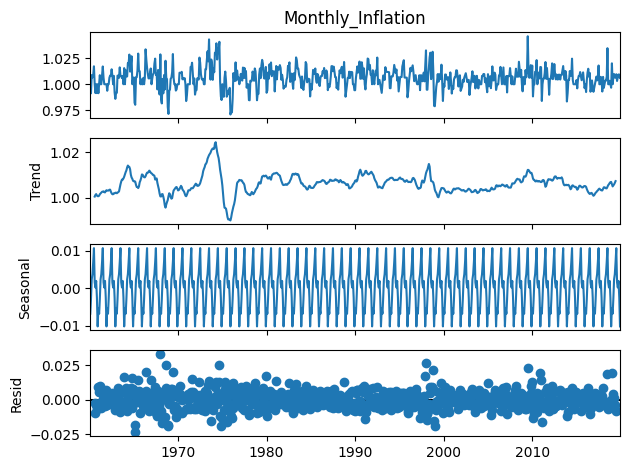

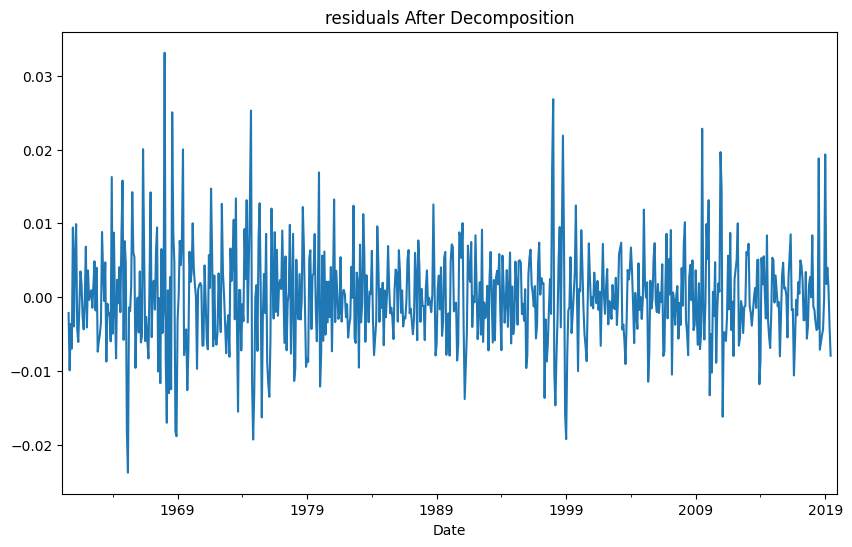

In [20]:

from statsmodels.tsa.seasonal import seasonal_decompose
df =infl_df.dropna()
# Decompose the time series data
result = seasonal_decompose(infl_df["Monthly_Inflation"], model='additive', period=12)# additive model in this case will give A good residual plot = random noise → model fits well.  
# Plot decomposition
result.plot()

plt.show() 
# Plot residuals
residual = result.resid
residual.plot(figsize=(10, 6))
plt.title("residuals After Decomposition")
plt.show()




**OBSERVATION**:
- There is no visible downward or upward trend however the  seasonality is very evident. THis suggests the time series is non stationary


# Analyzing ACF Plots for Stationarity check 
- The autocorrelation graph displays the correlation between the observations at the current point in time and the observations at all previous points in time. Repearing spikes in autocorrelation graphs gives us an idea about presence of seasonlity


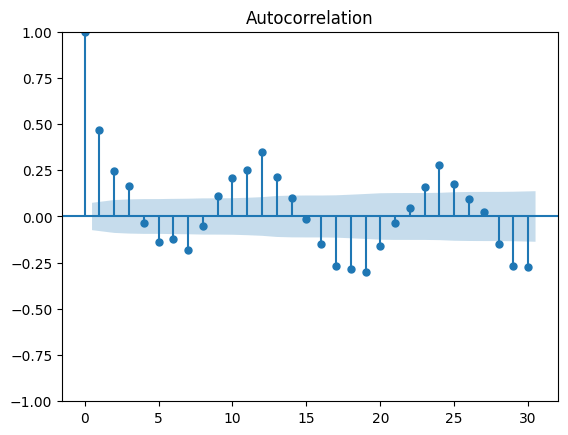

In [59]:
# subtracting the current value from the previous value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(infl_df["Monthly_Inflation"], lags=30)
plt.show()
plt.show()


**OBSERVATION**:
- In the  plot we observe significant spikes for most of the lags  and a clear repeating pattern  which indicates presence of seasonality


# Rolling Statistics 

Calcualting rolling mean and standard deviaiton for a window size of 6 months.

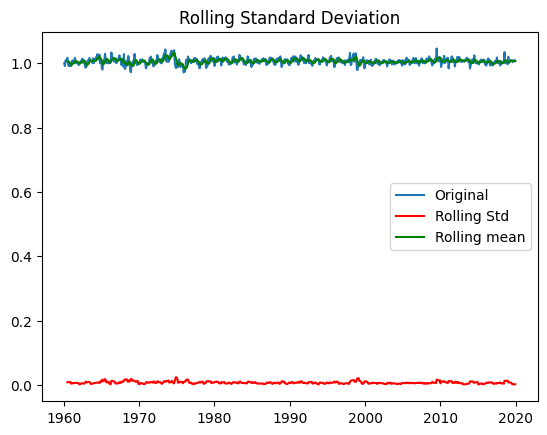

In [22]:
def plot_roll_mean_std(df,col):

    rolling_std =df[col].rolling(window=6).std()
    rolling_mean =df[col].rolling(window=6).mean()
    plt.plot(df[col], label='Original')
    plt.plot(rolling_std, label='Rolling Std', color='red')
    plt.plot(rolling_mean, label='Rolling mean', color='green')
    plt.legend()
    plt.title("Rolling Standard Deviation")
    plt.show() 
plot_roll_mean_std(infl_df,"Monthly_Inflation")


- **OBSERVATION**: 
From the plot we observe the varaince and mean are mostly stablle..This means the variance of is 


# Individual check on Trend and  Seasonlaity using **Mankendall** and **Freidmanchisquare test**


In [23]:
col="Monthly_Inflation"

In [24]:
import pymannkendall as mk
# Perform Mann-Kendall test

result = mk.original_test(infl_df[col].dropna())
print(result)

Mann_Kendall_Test(trend='no trend', h=False, p=0.602270082239404, z=-0.5211388020751264, Tau=-0.012978409350653376, s=-3350.0, var_s=41297472.666666664, slope=0.0, intercept=1.006125574268749)


In [25]:
from scipy.stats import friedmanchisquare
def seasonality_check(col):
    # Drop NaNs (e.g., from differencing)
    values = infl_df[col].dropna().values

    # Ensure the length is divisible by 12 (e.g., complete years)
    length = len(values) - (len(values) % 12)
    values = values[:length]

    # Reshape to (n_years, 12 months)
    data = values.reshape(-1, 12)

    # Apply Friedman test across columns (months)
    stat, p = friedmanchisquare(*data.T)
    print(f"Friedman p-value: {p:.6f}")  

    # If p-value < 0.05, reject the null hypothesis of equal distributions across months
    if p < 0.05:
        print("There are significant differences in the distributions of electric production across months, Means Seasonality exists.")   
    else:
        print("No significant differences in the distributions of electric production across months, Seasonality does not exist.")

seasonality_check("Monthly_Inflation")

Friedman p-value: 0.000000
There are significant differences in the distributions of electric production across months, Means Seasonality exists.


- **Results**
- No Trend 
- Presence of Strong Seasonality
- The data is non stationary



# Seasonal Differencing to achieve Stationary

In [52]:

infl_df['seasonal_adjusted_inflation_rate'] = infl_df['Monthly_Inflation'] - infl_df['Monthly_Inflation'].shift(12)
#inf_df2=infl_df.dropna()

In [53]:
col="seasonal_adjusted_inflation_rate"

In [54]:
seasonality_check("seasonal_adjusted_inflation_rate")

Friedman p-value: 0.996922
No significant differences in the distributions of electric production across months, Seasonality does not exist.


# Determining order of SARIMA using ACF/PACF Plots on Seasonally adjusted data
-The autocorrelation graph displays the correlation between the observations at the current point in time and the observations at all previous points in time. Spike in autocorrelation graphs tells us the number of Auto-Regressive (AR) terms or the number of lags.
- The partial autocorrelation graph displays the duration of the influence of a random shock, i.e. correlation which is not explained by the set of explanatory variables. Spike in the partial autocorrelation tells us the number of Moving Average (MR) Terms.

---
- On the  y_axis we have the pearson correatation values between -1 and 1 , 1 = perfect posiitve correatlion, -1 = perfect negative correlation and 0 = no correaltion.
- The shaded region in both the graphs represents a 95% confidence interval band. 
- Anything outside the shaded region signifies a statistically significant correlation.
- Anything within the shaded region signifies no significant correltion

In [55]:
infl_df.dropna(inplace = True)

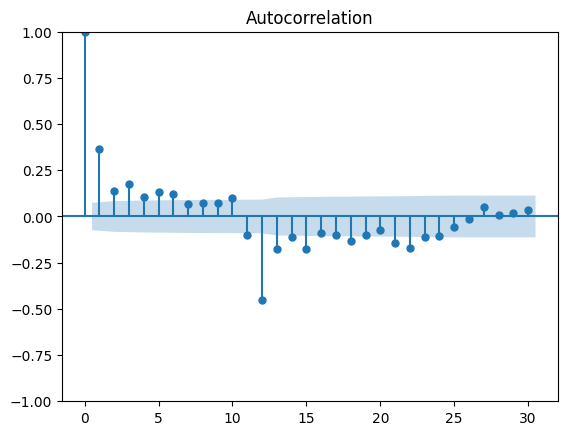

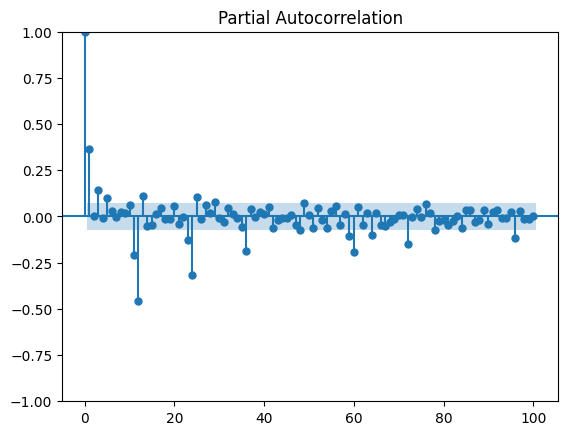

In [56]:
# subtracting the current value from the previous value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(infl_df[col], lags=30)
plt.show()

plot_pacf(infl_df[col], lags=100)
plt.show()

- **Observations**
The ACF plot shows significant spikes at  1, 2 ,3,4,5,6 and a significant downward spike at lag 12 
The PACF plot shows  significant spikes at  1, 3,5,13  and downward significant spikes at 11 and 12. There are some significant downward spikes but we will not consider them.
- **Final Result**
- For AR terms  we will consider  p = [1,3]
- Moving Average terms = q = [1,5]
- We will try out these combinations and evaluate our model perforamnce on forecasted values 

# Train/Test Split

In [61]:
len(infl_df["Monthly_Inflation"])

701

In [62]:
infl_df.asfreq('ME')
train = infl_df["Monthly_Inflation"][:-200]
test = infl_df["Monthly_Inflation"][-200:]# last 200 months for test data

In [63]:
test.head()

Date
2003-05-01    1.002028
2003-06-01    1.006073
2003-07-01    1.008048
2003-08-01    0.996008
2003-09-01    1.000000
Name: Monthly_Inflation, dtype: float64

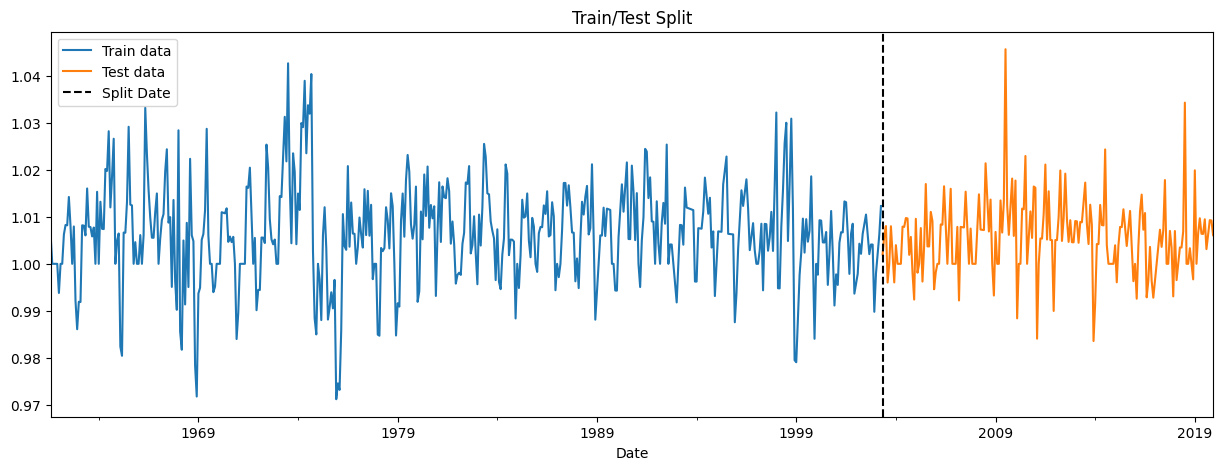

In [64]:


fig, ax = plt.subplots(figsize=(15, 5))  

train.plot(ax=ax, label="Train data")
test.plot(ax=ax, label="Test data")

ax.axvline("2003-05-01 ", color="black", linestyle="--", label="Split Date")  # ✅ pass an actual date value

ax.legend()
plt.title("Train/Test Split")
plt.show()


# Modeling with Sarima

## Using Auto arima to  to detect the best order by AIC

In [100]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")




stepwise_model = auto_arima(train,
                             seasonal=True, m=12, 
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

print(f"\nBest SARIMA model order: {stepwise_model.order} Seasonal Order: {stepwise_model.seasonal_order}")





Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-3024.424, Time=1.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-3145.539, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-3302.218, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1430.188, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-3277.524, Time=0.25 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-3263.186, Time=2.03 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-2967.882, Time=1.03 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-3186.034, Time=0.39 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-3314.690, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-3306.476, Time=0.20 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-3327.606, Time=2.00 sec
 ARIMA(1,0,1)(1,0,0)[12]

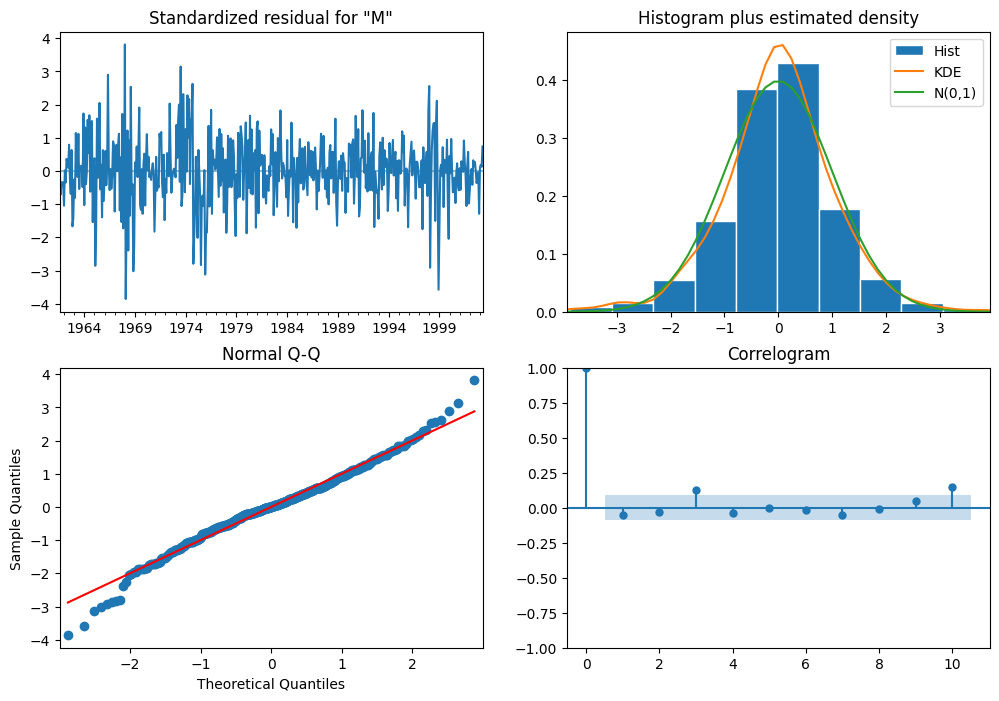

In [131]:



model1 = SARIMAX(train,
                order=stepwise_model.order,
                seasonal_order=stepwise_model.seasonal_order,
               
                 trend='c',
               ).fit(disp=True)


# Step 6: Model diagnostics
model1.plot_diagnostics(figsize=(12, 8))
plt.show()

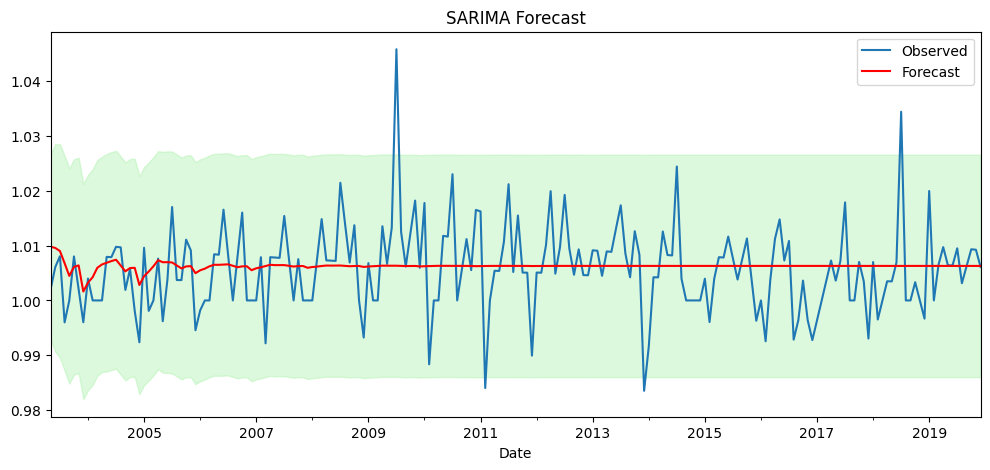

In [140]:
# Step 7: Forecast future values
n_forecast = len(test) 


forecast1 = model1.get_forecast(steps=n_forecast)
forecast_mean1 = forecast1.predicted_mean
forecast_ci1 = forecast1.conf_int()

# Plot the forecast
ax = test.plot(label='Observed', figsize=(12, 5))
forecast1.predicted_mean.plot(ax=ax, label='Forecast', color='red')
ax.fill_between(forecast_ci1.index,
                forecast_ci1.iloc[:, 0],
                forecast_ci1.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


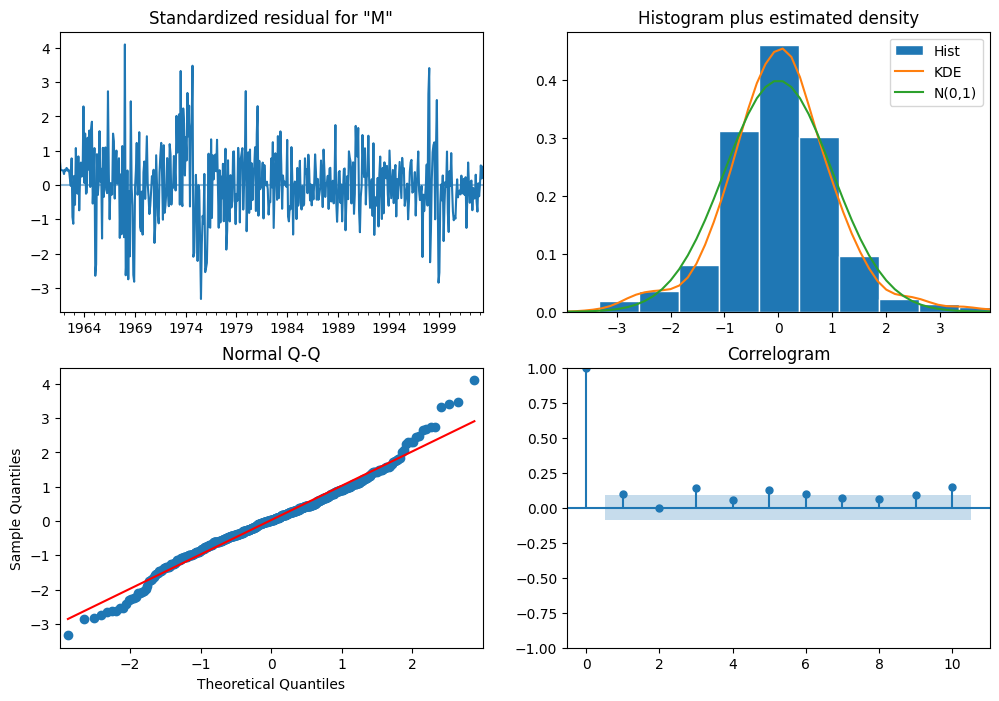

In [141]:



model2 = SARIMAX(train,
                order=(1,0,1),
                seasonal_order=(1,0,1,12),
               
                 trend='c',
               ).fit(disp=True)


# Step 6: Model diagnostics
model2.plot_diagnostics(figsize=(12, 8))
plt.show()

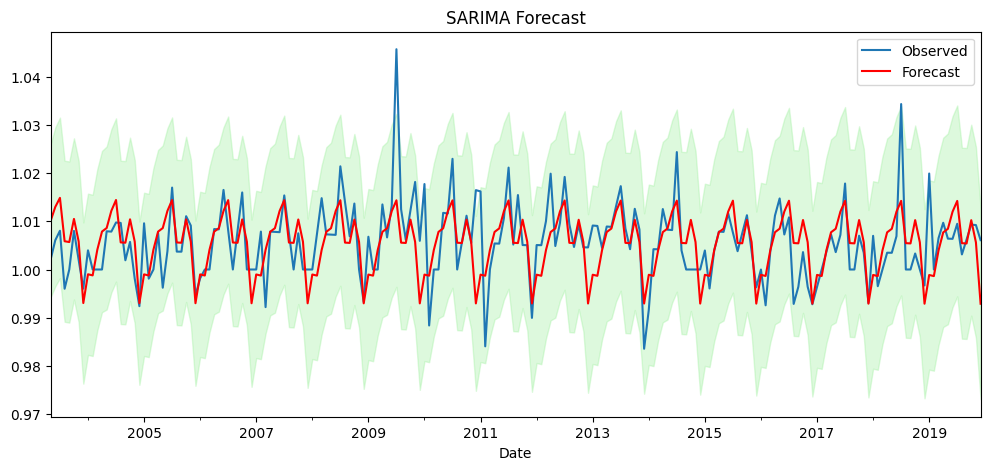

In [138]:
# Step 7: Forecast future values
n_forecast = len(test) 


forecast2 = model2.get_forecast(steps=n_forecast)
forecast_mean2 = forecast2.predicted_mean
forecast_ci2 = forecast2.conf_int()

# Plot the forecast
ax = test.plot(label='Observed', figsize=(12, 5))
forecast2.predicted_mean.plot(ax=ax, label='Forecast', color='red')
ax.fill_between(forecast_ci2.index,
                forecast_ci2.iloc[:, 0],
                forecast_ci2.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.legend()
plt.title("SARIMA Forecast")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

mae1 = mean_absolute_error(test, forecast_mean1)
rmse1 = np.sqrt(mean_squared_error(test, forecast_mean1))

mae2 = mean_absolute_error(test, forecast_mean2)
rmse2 = np.sqrt(mean_squared_error(test, forecast_mean2))

print("Mean Value of Test Dataset:", test.mean())
print(f"Test MAE Model 1: {mae1:.2f}")
print(f"Test RMSE Modle 2: {rmse1:.2f}")
print(f"Test MAE Model 1: {mae2:.2f}")
print(f"Test RMSE Modle 2: {rmse2:.2f}")






Mean Value of Test Dataset: 1.0056837643504641
Test MAE Model 1: 0.01
Test RMSE Modle 2: 0.01
Test MAE Model 1: 0.00
Test RMSE Modle 2: 0.01
